<a href="https://colab.research.google.com/github/sherry-shlee/python-sandbox/blob/main/kdc-stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

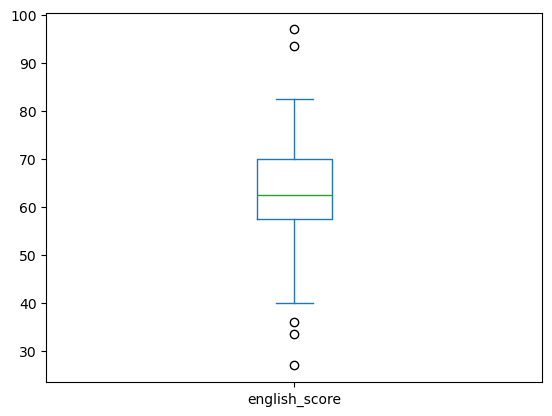

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/sherry-shlee/python-sandbox/main/kdc-dataset/test_school.csv')
df['english_score'].describe()
df['english_score'].plot(kind='box')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

car_df = pd.read_csv('https://raw.githubusercontent.com/sherry-shlee/python-sandbox/main/kdc-dataset/car.csv')
car_df.describe(include='all')
print(car_df['manufacturer'])

0              HYUNDAI
1               TOYOTA
2               NISSAN
3                  BMW
4        MERCEDES-BENZ
             ...      
12014           TOYOTA
12015        CHEVROLET
12016          HYUNDAI
12017            LEXUS
12018    MERCEDES-BENZ
Name: manufacturer, Length: 12019, dtype: object


<Axes: ylabel='Frequency'>

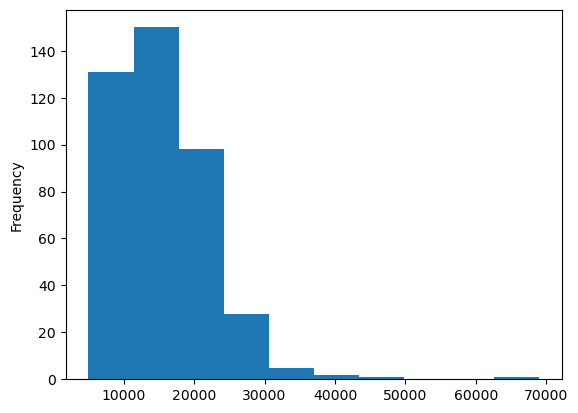

In [ ]:
hyundai_df = car_df[car_df['manufacturer']=='VOLKSWAGEN']
hyundai_df['price'].plot(kind='hist')

In [ ]:
import pandas as pd

data = [177, 183, 160, 164]
df = pd.DataFrame(data, columns=['height'])
print(df['height'].var())       # 표본분산 (N-1로 나눔)
print(df['height'].var(ddof=0)) # 모분산 (N으로 나눔)

116.66666666666667
87.5


<Axes: >

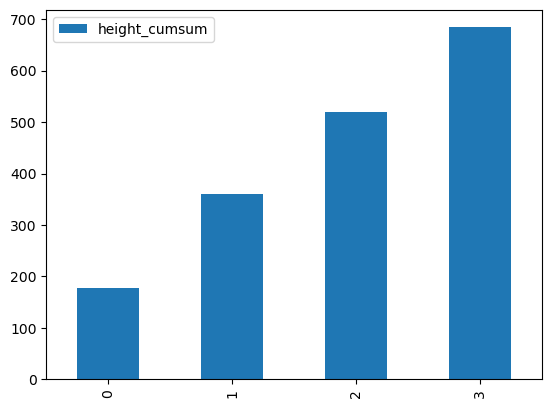

In [ ]:
df['height_cumsum'] = df['height'].cumsum()
df.plot(y='height_cumsum', kind='bar')

<Axes: xlabel='day'>

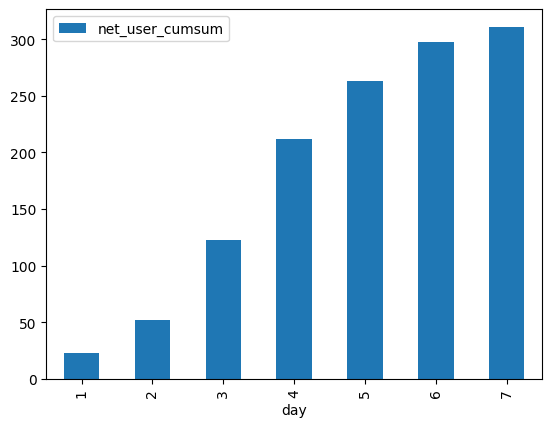

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

user_df = pd.read_csv('https://raw.githubusercontent.com/sherry-shlee/python-sandbox/main/kdc-dataset/user.csv')

user_df['net_user'] = user_df['register'] - user_df['unregister']
user_df['net_user_cumsum'] = user_df['net_user'].cumsum()

# DataFrame.plot을 사용해서 x, y 지정
user_df.plot(x='day', y='net_user_cumsum', kind='bar')

In [9]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/sherry-shlee/python-sandbox/main/kdc-dataset/netflix.csv')

df.groupby('genre').count()  # 결측값 제외된 count 표현
df.groupby('genre').size()  # 결측값 포함된 각 row별 size 표현

# 각 row별 모든 수치형변수col에 대한 기초통계량 산출
df.groupby('genre').min(numeric_only=True)
df.groupby('genre').max(numeric_only=True)
df.groupby('genre').mean(numeric_only=True)
df.groupby('genre').sum(numeric_only=True)

# 각 row별 특정 col에 대한 기초통계량 산출
df.groupby('genre')['score'].mean()

# 정렬순서 필요한 범주형변수는 Categorical() 처리 필요
# pd.Categorical(clothes_df['size'], ordered=True, categories=['XS', 'S', 'M', 'L', 'XL'])

,score
genre,
Comedy,5.518182
Documentary,6.941250
Drama,6.267797
Romantic comedy,5.722222
Thriller,5.687097


In [ ]:
# 멀티인덱싱 활용하기
df['year'] = pd.to_datetime(df['release']).dt.year
df['year'].dtype  # 결과: dtype('int32')
df.groupby(['genre', 'year']).mean(numeric_only=True).loc['Drama']
df.groupby(['year', 'genre']).mean(numeric_only=True).loc[2020]
df.groupby(['year', 'genre']).mean(numeric_only=True).loc[(2020, ['Drama','Comedy']),:]

years = sorted(df['year'].unique())  # 중복없는 모든연도 산출
df.groupby(['year', 'genre']).mean(numeric_only=True).loc[(years, 'Drama'), :]

,,runtime,score
year,genre,,
2019,Drama,107.857143,6.335714
2020,Drama,103.000000,6.055556
2021,Drama,110.500000,6.533333


In [7]:
# agg() = 집계함수
df.groupby('genre')['score'].agg('mean')
df.groupby('genre')['score'].agg(['min','max','mean'])

# 그룹화 후 컬럼별 집계결과 커스터마이징 가능
df.groupby('genre').agg({
    'score':'mean',
    'runtime': ['min','max']
    })

score runtime     
                     mean     min  max
genre                                 
Comedy           5.518182      30  139
Documentary      6.941250      16  144
Drama            6.267797      17  151
Romantic comedy  5.722222      85  131
Thriller         5.687097      81  149

In [14]:
# pd.pivot_table() = 피벗테이블 생성 (aggfunc기본값='mean')
df['year'] = pd.to_datetime(df['release']).dt.year
pd.pivot_table(df, values='score', index='year', columns='genre', aggfunc='max')

genre,Comedy,Documentary,Drama,Romantic comedy,Thriller
year,,,,,
2019,6.9,8.3,7.9,6.8,6.6
2020,7.2,9.0,7.8,6.4,7.3
2021,6.3,8.2,7.2,6.6,6.5
